In [1]:
# import rsatoolbox
# from rsatoolbox.rdm import calc_rdm, calc_rdm_movie
import numpy as np
import matplotlib.pyplot as plt 
from utils import *

In [79]:
d = 6
lag = 5

position =  np.load('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/behaviour/position_data.npy')
ids = np.arctan2(position[:, 1,-1], position[:, 0,-1]).argsort()

SCA_n = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/kernel_/neural_psth/projection_{d}d_linear.npy")[ids][:,:,:-lag]
kSCA_n = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/kernel_/neural_psth/projection_{d}d_gaussian.npy")[ids][:,:,:-lag]
PCA_n = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/pca_psth/Y_pca_{d}d.npy")[ids][:,:,:-lag]
neural_data = pre_processing( np.load(f'/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/psth.npy').swapaxes(1,2), center=False, pca=False, soft_normalize='max')[0][ids][:,:,:-lag]
#neural_data = np.load('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/X_softNormMax_centerFalse.npy')[ids]

SCA_b = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/kernel_/aug_behaviour/projection_{d}d_linear.npy")[ids][:,:,lag:]
kSCA_b = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/kernel_/aug_behaviour/projection_{d}d_gaussian.npy")[ids][:,:,lag:]
PCA_b = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/pca_psth/Y_pca_{d}d_behaviour.npy")[ids][:,:,lag:]
aug_behaviour =  np.load('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/behaviour/aug_behaviour.npy')[ids][:,:,lag:]

model_names = ['PCA','SCA', 'kSCA', 'Neural data']

In [80]:
K, N, T = SCA_n.shape
ls_rdm_SCA_n = []
ls_rdm_kSCA_n = []
ls_rdm_PCA_n = []
ls_rdm_SCA_b = []
ls_rdm_kSCA_b = []
ls_rdm_PCA_b = []
ls_rdm_neural_data = []
ls_rdm_behaviour = []
for t in range(T):
    ls_rdm_SCA_n.append( 1 - np.corrcoef(SCA_n[:,:,t]) )
    ls_rdm_kSCA_n.append( 1 - np.corrcoef(kSCA_n[:,:,t]) )
    ls_rdm_PCA_n.append( 1 - np.corrcoef(PCA_n[:,:,t]) )
    ls_rdm_SCA_b.append( 1 - np.corrcoef(SCA_b[:,:,t]) )
    ls_rdm_kSCA_b.append( 1 - np.corrcoef(kSCA_b[:,:,t]) )
    ls_rdm_PCA_b.append( 1 - np.corrcoef(PCA_b[:,:,t]) )
    ls_rdm_neural_data.append( 1 - np.corrcoef(neural_data[:,:,t]) )
    ls_rdm_behaviour.append( 1 - np.corrcoef(aug_behaviour[:,:,t]) )

Text(0.05, 1, 'a')

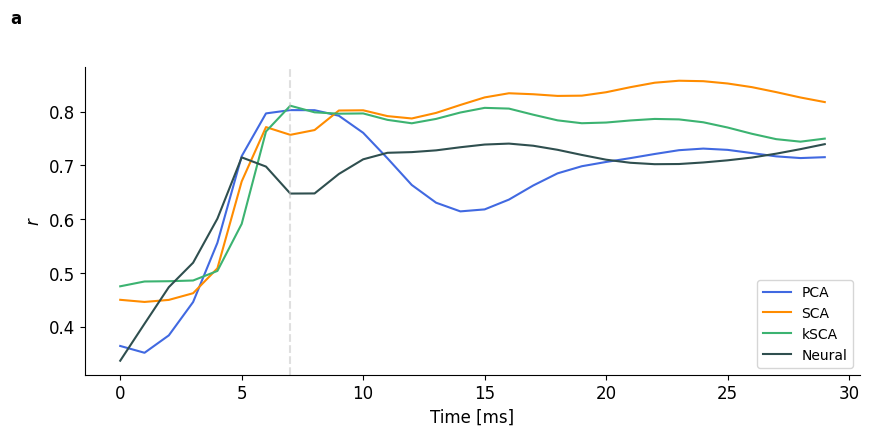

In [81]:
ls_r_pca = []
ls_r_sca = []
ls_r_ksca = []
ls_r_neural = []
for i in range(T):
    ls_r_pca.append( np.corrcoef(ls_rdm_PCA_n[i].flatten(), ls_rdm_PCA_b[i].flatten())[0,1] )
    ls_r_sca.append( np.corrcoef(ls_rdm_SCA_n[i].flatten(),ls_rdm_SCA_b[i].flatten())[0,1] )
    ls_r_ksca.append( np.corrcoef(ls_rdm_kSCA_n[i].flatten(), ls_rdm_kSCA_b[i].flatten())[0,1] )
    ls_r_neural.append( np.corrcoef(ls_rdm_neural_data[i].flatten(), ls_rdm_behaviour[i].flatten())[0,1] )

full_time = True
fontsize = 12
linewidth= 1.6
colors= ['royalblue', 'darkorange', 'mediumseagreen', 'darkslategrey']
fig, ax = plt.subplots(figsize=(10,4))
if full_time == False:
    ax.plot(ls_r_pca[13:], label='PCA', color=colors[0], linewidth=linewidth)
    ax.plot(ls_r_sca[13:], label='SCA', color=colors[1],  linewidth=linewidth)
    ax.plot(ls_r_ksca[13:], label='kSCA', color=colors[2],  linewidth=linewidth)
    times = np.arange(20, 450, 20).tolist()   
    default_x_ticks = range(len(ls_r_pca[12:]))  
    ax.set_xticks(default_x_ticks) 
    ax.set_xticklabels(times)
    ax.locator_params(axis='x', nbins=5)
else:
    ax.plot(ls_r_pca, label='PCA', color=colors[0])
    ax.plot(ls_r_sca, label='SCA', color=colors[1])
    ax.plot(ls_r_ksca, label='kSCA', color=colors[2])
    ax.plot(ls_r_neural, label='Neural', color=colors[3])
    ax.axvline(7, color='silver', alpha=0.5, linestyle='--' )
    

    # times = np.arange(-230, 450, 20).tolist()   
    # total_range = 450 + 230  
    # step = total_range / (len(times) - 1)  # Step size between each index
    # indices = np.round((np.array([-230, 0, 450]) + 230) / step).astype(int)
    # ax.set_xticks(indices)
    # ax.set_xticklabels(['-230', 'mov', '450'])

ax.set_xlabel('Time [ms]', fontsize=fontsize)
ax.set_ylabel('$r$', fontsize=fontsize)
ax.legend(fontsize=fontsize-2, loc='lower right') #loc='upper left', bbox_to_anchor=(1, 1.1), 
ax.spines[['top','right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=fontsize)

fig.text(0.05, 1, 'a', va='center', rotation='horizontal', fontsize=fontsize, fontweight='bold')
#plt.grid()
#plt.show()

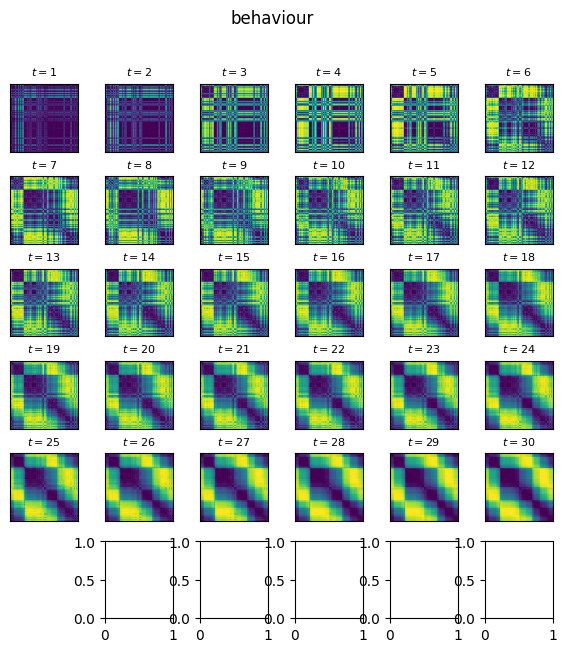

In [82]:
def get_RDM_movie(rdms, title):
    fig, axs = plt.subplots(6,6,figsize=(7,7))
    axs = axs.flatten()
    for i in range(len(rdms)):
        axs[i].imshow(rdms[i])
        axs[i].set_xticks([]) 
        axs[i].set_yticks([])
        axs[i].set_title(r'$t={}$'.format(i+1), fontsize=8)

    if len(axs) > len(rdms):
        axs[len(rdms)].axis('off')
    
    plt.suptitle(title)
    plt.subplots_adjust(wspace=0.4, hspace=0.2)
    plt.show()

get_RDM_movie(ls_rdm_behaviour, 'behaviour')


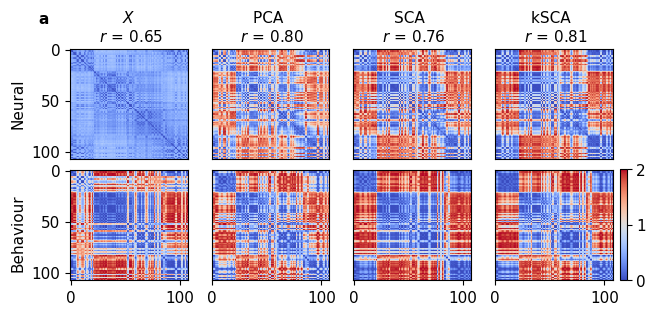

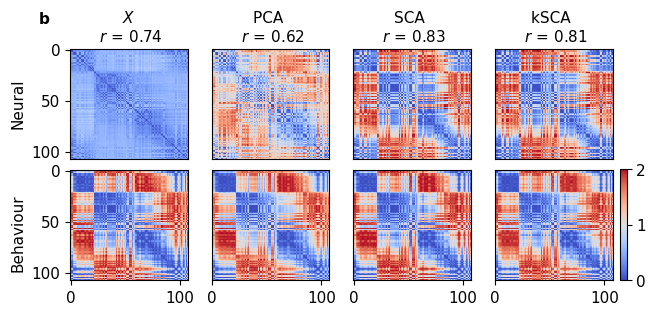

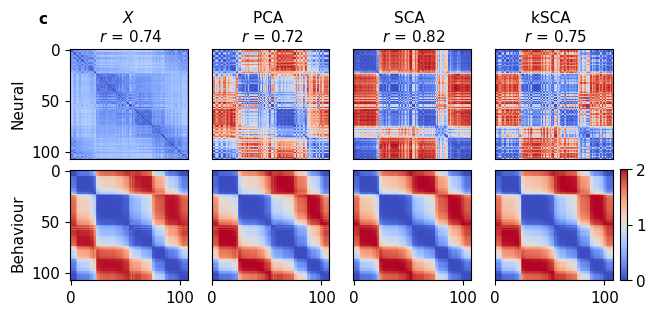

In [91]:
def get_RDMs(ind = 12, id='a'):
    fig, axs = plt.subplots(2, 4, figsize=(7, 3))
    titles = ['$X$', 'PCA', 'SCA', 'kSCA']  

    data_sources = [
        ls_rdm_neural_data[ind],
        ls_rdm_PCA_n[ind],
        ls_rdm_SCA_n[ind],
        ls_rdm_kSCA_n[ind],
        ls_rdm_behaviour[ind],
        ls_rdm_PCA_b[ind],
        ls_rdm_SCA_b[ind],
        ls_rdm_kSCA_b[ind],

    ]

    correls = [ls_r_neural, ls_r_pca, ls_r_sca, ls_r_ksca]

    axs = axs.flatten()

    fontsize=11
    for i, (ax,data) in enumerate(zip(axs, data_sources)):
        im = ax.imshow(data, aspect='auto', cmap='coolwarm', vmin=0, vmax=2) 
        ax.tick_params(axis='both', labelsize=fontsize)
        if i % 4 != 0:  
            ax.set_yticks([])
            ax.set_yticklabels([])
        # else:
        #     ax.set_ylabel('$k$', fontsize=fontsize)

        if i < len(axs) - 4:  
            ax.set_xticks([])
            ax.set_xticklabels([])
        # else:
        #     ax.set_xlabel('$k$', fontsize=fontsize)
        
        if i < 4:  
            ax.set_title(f'{titles[i]} \n $r$ = {correls[i][ind]:.2f}', fontsize=fontsize)
            

    cbar_ax = fig.add_axes([0.91, 0.11, 0.01, 0.37])  
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.ax.tick_params(labelsize=fontsize) 

    fig.text(0.05, 0.7, 'Neural', ha='center', va='center', rotation='vertical', fontsize=fontsize)
    fig.text(0.05, 0.27, 'Behaviour', ha='center', va='center', rotation='vertical', fontsize=fontsize)
    fig.text(0.08, 0.98, id, va='center', rotation='horizontal', fontsize=fontsize, fontweight='bold')

    plt.subplots_adjust(wspace=0.2, hspace=0.1)

get_RDMs(ind=7, id="a")
get_RDMs(ind=15, id="b")
get_RDMs(ind=-1, id="c")
    


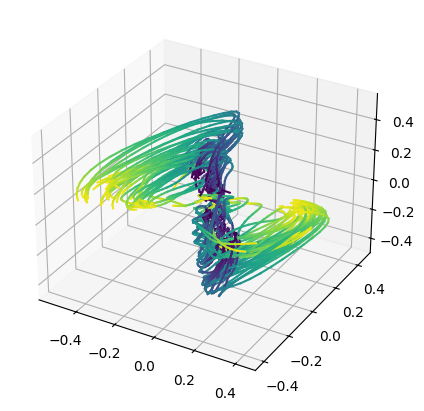

In [90]:
plot_3D(kSCA) #[96:105,:,:]

ENDS HERE 

In [ ]:

data = rsatoolbox.data.Dataset(np.random.rand(10, 5))
rdms = rsatoolbox.rdm.calc_rdm(data)
rsatoolbox.vis.show_rdm(rdms)

plt.figure(figsize=(3,3))
cmap = plt.get_cmap('gray_r')
plt.imshow( rdms.get_matrices().squeeze() , cmap=cmap) 
plt.colorbar()
plt.show()

In [ ]:
neural_K = rsatoolbox.data.TemporalDataset(kSCA,time_descriptors = tim_des)
neural_KT = neural_K.convert_to_dataset('time')
rdms_neural_KT = calc_rdm(neural_KT, method = 'euclidean')
model = rsatoolbox.model.ModelFixed('test', rdms_neural_KT)

np.corrcoef(rdms_behaviour_KT.get_vectors(), rdms_neural_KT.get_vectors())

In [ ]:
side = ['l', 'l', 'l', 'r', 'r', 'r']
stimulus = [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
data = rsatoolbox.data.Dataset(
    np.random.rand(10, 6),
    channel_descriptors={'side': side},
    obs_descriptors={'stimulus': stimulus})

rdms = rsatoolbox.rdm.calc_rdm(data)
model = rsatoolbox.model.ModelFixed('test', rdms)

plt.imshow(rdms.get_matrices().squeeze())
rdms.get_matrices().squeeze()

In [ ]:
results_1 = rsatoolbox.inference.eval_fixed(models, rdms_behaviour_K, method='corr')
print(results_1)

In [ ]:
ids = np.arctan2(position[:, 1,-1], position[:, 0,-1]).argsort()
for i,ids in enumerate(ids[:8]):
    plt.plot(position[ids,0,:], position[ids,1,:])